In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/canse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/canse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/canse/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df_train = pd.read_csv("data/train.csv")
df_games = pd.read_csv("data/game_overview.csv")

In [5]:
print(df_train.head())
print(df_train.info())
print(df_train["user_suggestion"].value_counts(normalize=True))

   review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I'm scared and hearing creepy voices.  So I'll...                1  
1  Best game, more better than Sam Pepper's YouTu...                1  
2  A littly iffy on the controls, but once you kn...                1  
3  Great game, fun and colorful and all that.A si...                1  
4  Not many games have the cute tag right next to...                1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1 

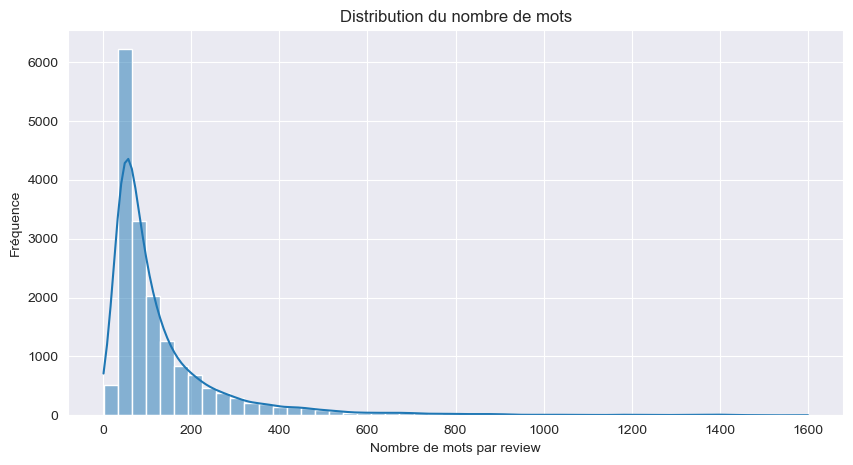

In [6]:
df_train["review_length"] = df_train["user_review"].apply(lambda x: len(str(x).split()))
df_train["char_length"] = df_train["user_review"].apply(lambda x: len(str(x)))

plt.figure(figsize=(10,5))
sns.histplot(df_train["review_length"], bins=50, kde=True)
plt.title("Distribution du nombre de mots")
plt.xlabel("Nombre de mots par review")
plt.ylabel("Fréquence")
plt.show()

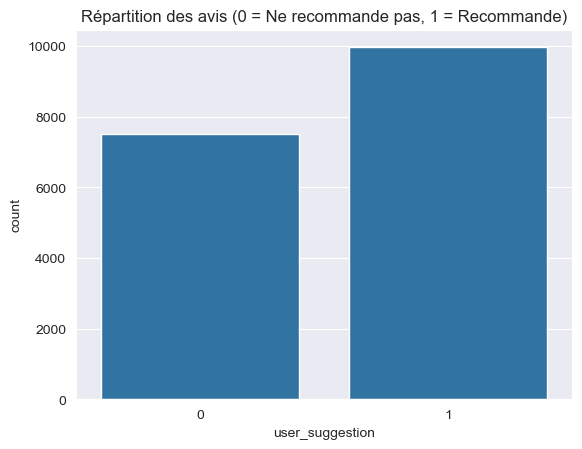

In [7]:
sns.countplot(x="user_suggestion", data=df_train)
plt.title("Répartition des avis (0 = Ne recommande pas, 1 = Recommande)")
plt.show()

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [10]:
df_train["clean_review"] = df_train["user_review"].apply(clean_text)

In [11]:
print(df_train[["user_review", "clean_review"]].sample(5))

                                             user_review  \
909    Early Access ReviewFractured Space has a great...   
12552  This game is very fun in many ways, but someti...   
3846   >Be me>9 years old>I loved Gaben so much>I had...   
13743  Early Access ReviewIntresting game. If you lik...   
7899   Ok in your head you are probably "Minecraft Ri...   

                                            clean_review  
909    early access reviewfractured space great deal ...  
12552  game fun many way sometimes can♥♥♥♥♥♥you examp...  
3846   year oldi loved gaben muchi game merchandiseth...  
13743  early access reviewintresting game like minecr...  
7899   ok head probably minecraft ripoff game go way ...  
